## Análise de Bolsas de Pós Graduação Academica Concedidas Pelo CAPES

## Bibliotecas

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Carregando e Visualizando a Base de Dados

In [2]:
# Carregando o dataset
dataset = pd.read_csv('./dados/capes-bolsas-dataset.csv')

# Visualizando as 3 primeiras linhas
dataset.head(3)

,Ano,UF,Município,Região,Código Programa,Programa Fomento,IES,Status Jurídico,Programa,Área Avaliação,...,JOVENS TALENTOS - A,JOVENS TALENTOS - B,MESTRADO,MESTRADO PROFISSIONAL,PESQUISADOR VISITANTE ESPECIAL,PROF VISITANTE NACIONAL SÊNIOR,PROFESSOR VISITANTE EXTERIOR PLENO,PROFESSOR VISITANTE EXTERIOR SENIOR,PÓS-DOUTORADO,Total Linha
0,2020,AC,RIO BRANCO,NORTE,10001018002P1,PROCAD-AM,UFAC,Federal,BIOLOGIA EXPERIMENTAL,CIÊNCIAS BIOLÓGICAS III ...,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,2020,AC,RIO BRANCO,NORTE,11001011001P8,DS,UFAC,Federal,ECOLOGIA E MANEJO DE RECURSOS NATURAIS,BIODIVERSIDADE ...,...,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,9
2,2020,AC,RIO BRANCO,NORTE,11001011001P8,PNPD,UFAC,Federal,ECOLOGIA E MANEJO DE RECURSOS NATURAIS,BIODIVERSIDADE ...,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [3]:
# Visualizando as 3 últimas linhas
dataset.tail(3)

,Ano,UF,Município,Região,Código Programa,Programa Fomento,IES,Status Jurídico,Programa,Área Avaliação,...,JOVENS TALENTOS - A,JOVENS TALENTOS - B,MESTRADO,MESTRADO PROFISSIONAL,PESQUISADOR VISITANTE ESPECIAL,PROF VISITANTE NACIONAL SÊNIOR,PROFESSOR VISITANTE EXTERIOR PLENO,PROFESSOR VISITANTE EXTERIOR SENIOR,PÓS-DOUTORADO,Total Linha
154913,1995,SP,SÃO PAULO,SUDESTE,33019010006P4,DS,FCMSCSP-TI,Privada,MEDICINA (PEDIATRIA),MEDICINA II ...,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,12
154914,1995,SP,SÃO PAULO,SUDESTE,33019010007P0,DS,FCMSCSP-TI,Privada,MEDICINA (OTORRINOLARINGOLOGIA),MEDICINA III ...,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,5
154915,1995,SP,SÃO PAULO,SUDESTE,33038015003P2,DS,IAMSPE,Estadual,MEDICINA (GASTROENTEROLOGIA CIRÚRGICA),MEDICINA III ...,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,5


In [4]:
# Colunas do dataset
dataset.columns

Index(['Ano', 'UF', 'Município', 'Região', 'Código Programa',
       'Programa Fomento', 'IES', 'Status Jurídico', 'Programa',
       'Área Avaliação', 'Área Conhecimento', 'Grande Área', 'Codigo IES',
       'DOUTORADO PLENO', 'DOUTORADO PROFFISIONAL', 'Iniciação Científica',
       'JOVENS TALENTOS - A', 'JOVENS TALENTOS - B', 'MESTRADO',
       'MESTRADO PROFISSIONAL', 'PESQUISADOR VISITANTE ESPECIAL',
       'PROF VISITANTE NACIONAL SÊNIOR', 'PROFESSOR VISITANTE EXTERIOR PLENO',
       'PROFESSOR VISITANTE EXTERIOR SENIOR', 'PÓS-DOUTORADO', 'Total Linha'],
      dtype='object')

In [5]:
# Informações da base
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154916 entries, 0 to 154915
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Ano                                  154916 non-null  int64  
 1   UF                                   154916 non-null  object 
 2   Município                            154916 non-null  object 
 3   Região                               154916 non-null  object 
 4   Código Programa                      148312 non-null  object 
 5   Programa Fomento                     154916 non-null  object 
 6   IES                                  154915 non-null  object 
 7   Status Jurídico                      154916 non-null  object 
 8   Programa                             148312 non-null  object 
 9   Área Avaliação                       154916 non-null  object 
 10  Área Conhecimento                    154916 non-null  object 
 11  Grande Área  

In [6]:
# Dimensões do dataset
dataset.shape

(154916, 26)

In [7]:
# Verificando dados nulos
dataset.isnull().sum()

Ano                                         0
UF                                          0
Município                                   0
Região                                      0
Código Programa                          6604
Programa Fomento                            0
IES                                         1
Status Jurídico                             0
Programa                                 6604
Área Avaliação                              0
Área Conhecimento                           0
Grande Área                                 0
Codigo IES                             125450
DOUTORADO PLENO                             0
DOUTORADO PROFFISIONAL                 146111
Iniciação Científica                    75191
JOVENS TALENTOS - A                    125450
JOVENS TALENTOS - B                    125450
MESTRADO                                    0
MESTRADO PROFISSIONAL                   59026
PESQUISADOR VISITANTE ESPECIAL         125450
PROF VISITANTE NACIONAL SÊNIOR    

## Tratamento da Base

In [29]:
# Seleção de colunas para exclusão
colunas = ['Código Programa','Programa Fomento', 'IES','Programa',
       'Área Avaliação', 'Área Conhecimento','Codigo IES',
       'DOUTORADO PROFFISIONAL', 'Iniciação Científica',
       'JOVENS TALENTOS - A', 'JOVENS TALENTOS - B', 
       'MESTRADO PROFISSIONAL', 'PESQUISADOR VISITANTE ESPECIAL',
       'PROF VISITANTE NACIONAL SÊNIOR', 'PROFESSOR VISITANTE EXTERIOR PLENO',
       'PROFESSOR VISITANTE EXTERIOR SENIOR', 'Total Linha']
base_tratada = dataset.drop(columns=colunas)

In [30]:
# Visualizando a base tratada
base_tratada.head()

,Ano,UF,Município,Região,Status Jurídico,Grande Área,DOUTORADO PLENO,MESTRADO,PÓS-DOUTORADO
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0.0
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
3,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
4,2020,AC,RIO BRANCO,NORTE,Federal,"LINGÜÍSTICA, LETRAS E ARTES ...",5,17,0.0


In [31]:
# Renomeando as variáveis
colunas_renomeadas = ['Ano', 'UF', 'Municipio', 'Regiao', 'Tipo', 'Area', 'Doutorado', 'Mestrado', 'PosDoc']
base_tratada.columns = colunas_renomeadas

In [32]:
# Visualizando alteração
base_tratada.head()

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0.0
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
3,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
4,2020,AC,RIO BRANCO,NORTE,Federal,"LINGÜÍSTICA, LETRAS E ARTES ...",5,17,0.0


In [33]:
# Verificando nulos na variável 'PosDoc'
base_tratada['PosDoc'] = base_tratada['PosDoc'].fillna(0)

# Visualizando
base_tratada.head()

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0.0
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
3,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
4,2020,AC,RIO BRANCO,NORTE,Federal,"LINGÜÍSTICA, LETRAS E ARTES ...",5,17,0.0


In [34]:
# Mudando o tipo da variável PosDoc
base_tratada['PosDoc'] = base_tratada['PosDoc'].astype(int)

# Visualizando base
base_tratada.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1


In [35]:
# Informações do dataset tratado
base_tratada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154916 entries, 0 to 154915
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Ano        154916 non-null  int64 
 1   UF         154916 non-null  object
 2   Municipio  154916 non-null  object
 3   Regiao     154916 non-null  object
 4   Tipo       154916 non-null  object
 5   Area       154916 non-null  object
 6   Doutorado  154916 non-null  int64 
 7   Mestrado   154916 non-null  int64 
 8   PosDoc     154916 non-null  int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 10.0+ MB


In [36]:
# Dimensões do dataset tratado
base_tratada.shape

(154916, 9)

In [46]:
# Criando coluna total
base_tratada['Total'] = base_tratada[['Doutorado', 'Mestrado', 'PosDoc']].sum(axis=1)
base_tratada.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1,1
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0,9
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1,1


In [48]:
# Ordenando base
base_tratada = base_tratada.sort_values('Ano')

# Visualizando 
base_tratada.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total
154915,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS DA SAÚDE ...,0,5,0,5
154891,1995,SP,SÃO PAULO,SUDESTE,Federal,CIÊNCIAS DA SAÚDE ...,3,0,0,3
154053,1995,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS SOCIAIS APLICADAS ...,0,18,0,18


In [82]:
# Verificando dados da variável Area
base_tratada['Area'].unique()

array(['CIÊNCIAS DA SAÚDE                                           ',
       'CIÊNCIAS SOCIAIS APLICADAS                                  ',
       'CIÊNCIAS EXATAS E DA TERRA                                  ',
       'CIÊNCIAS BIOLÓGICAS                                         ',
       'CIÊNCIAS HUMANAS                                            ',
       'LINGÜÍSTICA, LETRAS E ARTES                                 ',
       'CIÊNCIAS AGRÁRIAS                                           ',
       'MULTIDISCIPLINAR                                            ',
       'ENGENHARIAS                                                 ',
       'Grande Area Não Informada                                   '],
      dtype=object)

In [85]:
# Removendo espaços a direita
base_tratada['Area'] = base_tratada['Area'].apply(lambda x: x.strip(), 1)

In [86]:
# Verificando tranformação
base_tratada['Area'].unique()

array(['CIÊNCIAS DA SAÚDE', 'CIÊNCIAS SOCIAIS APLICADAS',
       'CIÊNCIAS EXATAS E DA TERRA', 'CIÊNCIAS BIOLÓGICAS',
       'CIÊNCIAS HUMANAS', 'LINGÜÍSTICA, LETRAS E ARTES',
       'CIÊNCIAS AGRÁRIAS', 'MULTIDISCIPLINAR', 'ENGENHARIAS',
       'Grande Area Não Informada'], dtype=object)

In [103]:
# Criando categoria Biologicas
lista_biologicas = ['CIÊNCIAS DA SAÚDE', 'CIÊNCIAS BIOLÓGICAS', 'CIÊNCIAS AGRÁRIAS']
base_tratada.loc[base_tratada['Area'].isin(lista_biologicas), 'Categoria'] = 'Biologicas'
base_tratada.loc[base_tratada['Categoria'] == 'Biologicas']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
154915,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS DA SAÚDE,0,5,0,5,Biologicas
154891,1995,SP,SÃO PAULO,SUDESTE,Federal,CIÊNCIAS DA SAÚDE,3,0,0,3,Biologicas
154913,1995,SP,SÃO PAULO,SUDESTE,Privada,CIÊNCIAS DA SAÚDE,5,7,0,12,Biologicas
154912,1995,SP,SÃO PAULO,SUDESTE,Privada,CIÊNCIAS DA SAÚDE,0,6,0,6,Biologicas
154911,1995,SP,SÃO PAULO,SUDESTE,Privada,CIÊNCIAS DA SAÚDE,0,3,0,3,Biologicas
...,...,...,...,...,...,...,...,...,...,...,...
12,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS AGRÁRIAS,8,23,0,31,Biologicas
13,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS AGRÁRIAS,0,0,4,4,Biologicas
15,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS DA SAÚDE,0,7,0,7,Biologicas
9,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS DA SAÚDE,3,2,0,5,Biologicas


In [102]:
# Criando categoria Humanas
lista_humanas = ['CIÊNCIAS SOCIAIS APLICADAS', 'CIÊNCIAS HUMANAS', 'LINGÜÍSTICA, LETRAS E ARTES']
base_tratada.loc[base_tratada['Area'].isin(lista_humanas), 'Categoria'] = 'Humanas'
base_tratada.loc[base_tratada['Categoria'] == 'Humanas']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
154053,1995,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS SOCIAIS APLICADAS,0,18,0,18,Humanas
154906,1995,SP,SÃO PAULO,SUDESTE,Privada,CIÊNCIAS SOCIAIS APLICADAS,0,26,0,26,Humanas
154905,1995,SP,SÃO PAULO,SUDESTE,Privada,CIÊNCIAS SOCIAIS APLICADAS,1,0,0,1,Humanas
154903,1995,SP,SÃO PAULO,SUDESTE,Privada,CIÊNCIAS SOCIAIS APLICADAS,33,3,0,36,Humanas
154902,1995,SP,SÃO PAULO,SUDESTE,Privada,CIÊNCIAS SOCIAIS APLICADAS,14,28,0,42,Humanas
...,...,...,...,...,...,...,...,...,...,...,...
4,2020,AC,RIO BRANCO,NORTE,Federal,"LINGÜÍSTICA, LETRAS E ARTES",5,17,0,22,Humanas
5,2020,AC,RIO BRANCO,NORTE,Federal,"LINGÜÍSTICA, LETRAS E ARTES",0,0,1,1,Humanas
6,2020,AC,RIO BRANCO,NORTE,Federal,"LINGÜÍSTICA, LETRAS E ARTES",0,0,0,0,Humanas
68,2020,AL,MACEIÓ,NORDESTE,Federal,CIÊNCIAS SOCIAIS APLICADAS,3,2,0,5,Humanas


In [101]:
# Criando categoria Exatas
lista_exatas = ['CIÊNCIAS EXATAS E DA TERRA', 'ENGENHARIAS']
base_tratada.loc[base_tratada['Area'].isin(lista_exatas), 'Categoria'] = 'Exatas'
base_tratada.loc[base_tratada['Categoria'] == 'Exatas']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
154908,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS EXATAS E DA TERRA,0,1,0,1,Exatas
154907,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS EXATAS E DA TERRA,12,5,0,17,Exatas
154755,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS EXATAS E DA TERRA,6,0,0,6,Exatas
154757,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS EXATAS E DA TERRA,9,0,0,9,Exatas
154761,1995,SP,SÃO PAULO,SUDESTE,Estadual,ENGENHARIAS,1,6,0,7,Exatas
...,...,...,...,...,...,...,...,...,...,...,...
45,2020,AL,MACEIÓ,NORDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,1,2,0,3,Exatas
51,2020,AL,MACEIÓ,NORDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,0,7,0,7,Exatas
18,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS EXATAS E DA TERRA,0,2,0,2,Exatas
65,2020,AL,MACEIÓ,NORDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,0,9,0,9,Exatas


In [111]:
# Criando categoria Multidisciplinar
lista = ['MULTIDISCIPLINAR']
base_tratada.loc[base_tratada['Area'].isin(lista), 'Categoria'] = 'Multidisciplinar'
base_tratada.loc[base_tratada['Categoria'] == 'Multidisciplinar']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
154801,1995,SP,SÃO PAULO,SUDESTE,Privada,MULTIDISCIPLINAR,0,6,0,6,Multidisciplinar
154788,1995,SP,SÃO PAULO,SUDESTE,Estadual,MULTIDISCIPLINAR,0,8,0,8,Multidisciplinar
154782,1995,SP,SÃO PAULO,SUDESTE,Estadual,MULTIDISCIPLINAR,0,7,0,7,Multidisciplinar
154764,1995,SP,SÃO PAULO,SUDESTE,Estadual,MULTIDISCIPLINAR,0,2,0,2,Multidisciplinar
154763,1995,SP,SÃO PAULO,SUDESTE,Estadual,MULTIDISCIPLINAR,0,11,0,11,Multidisciplinar
...,...,...,...,...,...,...,...,...,...,...,...
23,2020,AC,RIO BRANCO,NORTE,Federal,MULTIDISCIPLINAR,1,0,0,1,Multidisciplinar
19,2020,AC,RIO BRANCO,NORTE,Federal,MULTIDISCIPLINAR,0,2,0,2,Multidisciplinar
20,2020,AC,RIO BRANCO,NORTE,Federal,MULTIDISCIPLINAR,0,2,0,2,Multidisciplinar
10,2020,AC,RIO BRANCO,NORTE,Federal,MULTIDISCIPLINAR,0,21,0,21,Multidisciplinar


In [113]:
# Removendo linhas de áreas não informadas
base_tratada = base_tratada.loc[base_tratada['Area'] != 'Grande Area Não Informada']

# Conferindo tratamento
base_tratada.loc[base_tratada['Area'] == 'Grande Area Não Informada']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria


## Análise Exploratória dos Dados (AED)

## Hipóteses

1. O número de bolsas concedidas pela Capes aumentou ao longo dos anos?
2. A distribuição de bolsas varia significativamente entre as grandes áreas de estudo?
3. A distribuição de bolsas é desigual entre as regiões geográficas do país?
4. O status jurídico que disponibiliza o maior número de bolsas é o Federal?
5. Pesquisas relacionadas à ciências humanas recebem mais concessão de bolsas?
6. A quantidade de bolsas diminui conforme aumenta o nível acadêmico?
7. No período analisado, a área com maior quantidade de bolsas se manteve durante os anos?
8. Qual a quantidade de Mestrandos e Doutorandos que recebem bolsa?

In [104]:
# Base de dados
dados = base_tratada.copy()

# Visualizando
dados.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
154915,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS DA SAÚDE,0,5,0,5,Biologicas
154891,1995,SP,SÃO PAULO,SUDESTE,Federal,CIÊNCIAS DA SAÚDE,3,0,0,3,Biologicas
154053,1995,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS SOCIAIS APLICADAS,0,18,0,18,Humanas


### 1. O número de bolsas concedidas pela Capes aumentou ao longo dos anos?

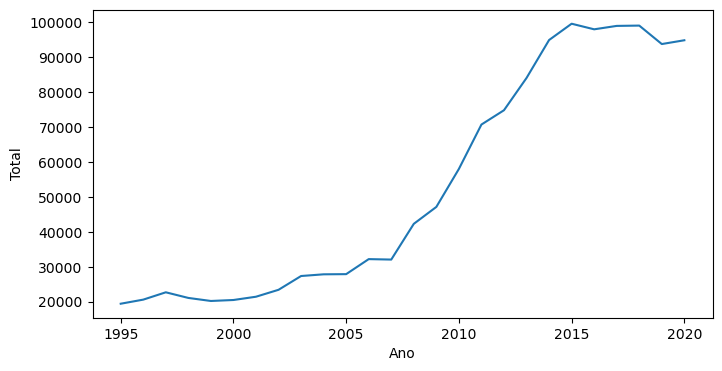

In [62]:
df = dados.groupby('Ano')['Total'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(df, x='Ano', y='Total')
plt.show()

### 2. A distribuição de bolsas varia significativamente entre as grandes áreas de estudo?

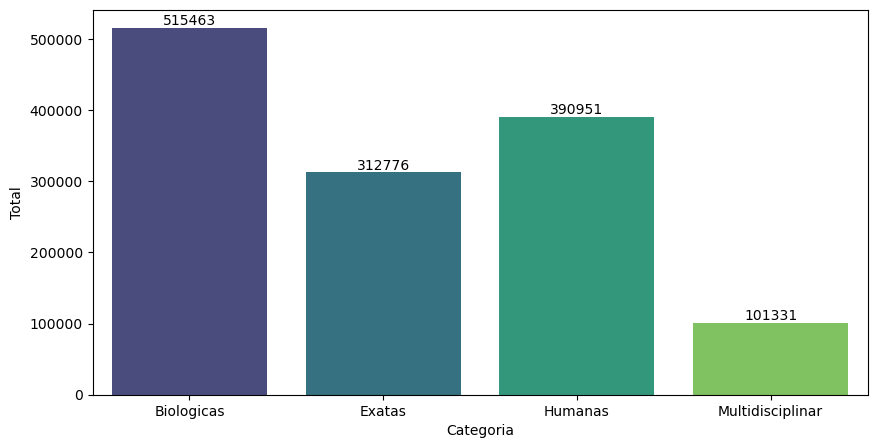

In [109]:
df = dados.groupby('Categoria')['Total'].sum().reset_index()
plt.figure(figsize=(10,5))
ax = sns.barplot(df, x='Categoria', y='Total', palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [110]:
dados.groupby('Categoria')['Total'].sum().reset_index()

,Categoria,Total
0,Biologicas,515463
1,Exatas,312776
2,Humanas,390951
3,Multidisciplinar,101331


### 3. A distribuição de bolsas é desigual entre as regiões geográficas do país?

### 4. O status jurídico que disponibiliza o maior número de bolsas é o Federal?

### 5. Pesquisas relacionadas à ciências humanas recebem mais concessão de bolsas?

### 6. A quantidade de bolsas diminui conforme aumenta o nível acadêmico?

### 7. No período analisado, a área com maior quantidade de bolsas se manteve durante os anos?

### 8. Qual a quantidade de Mestrandos e Doutorandos que recebem bolsa?

## Conclusão